In [108]:
# https://www.kaggle.com/loveall/cervical-cancer-risk-classification
# https://ieeexplore.ieee.org/document/
# NOTE: CHANGE ? to NA so that it can then compute mean and std for numeric cols

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
df.shape

(858, 36)

Data examination:

In [109]:
######### column names #########
print(df.columns)
    # note: CIN - Cervical Intraepithelial Neoplasia
    # note: Dx - Medical Abbreviation for Diagnosis

######### other data descriptors #########
# print(df.head(5))
# df.describe
# df.info()

######### how many unique values per feature? #########
#for col in df.columns:
    # print(np.unique(df[col],return_counts=True))
    
######### object type in each col: #########
# for col in df.columns:
    # print(df[col].dtype) # objects = string (meaning that because there's at least one string in that col, whole col treated
        # as string, even if most of the other rows in that col are actually int!)
    
######### how many unknowns per feature? #########
# for col in df.columns:
#     print(f'{col} : {len(df[df[col]=="?"])}')

######### mean and sd for each feature (ie column) #########
# df.mean()
# df.std()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


From Kaggle notebook (https://www.kaggle.com/atakansoztekin/cancer-data-analysis-and-model-implementation):

In [110]:
# replace "?" with na (easier to handle subsequently)
df = df.replace("?", np.nan)
# convert to float
df = df.astype(float)
# how many null values per feature?
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [111]:
# remove features with too many null values
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
# print(df.columns)
print(df.shape) # should have 2 features less

(858, 34)


In [112]:
######### Inferring missing data #########

# Strategy 1: KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=600)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
# df.isnull().sum()

# Strategy 2: replace na values with median of that feature
    # (not mean, since mean more vulnerable to outliers)
# for col in df.columns:
#     df[col].fillna(df[col].median(), inplace = True)
# df.isnull().sum()

In [113]:
print(df.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [114]:
######### Feature selection: smoking #########
# how many cigarettes has this person smoked in their life?
df['Smokes'] = df['Smokes (years)']*df['Smokes (packs/year)']
# remove redundant columns
df = df.drop(['Smokes (years)','Smokes (packs/year)'], axis=1)
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.00,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.00,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.55,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.00,4.000000,1369.000000,1.0,3.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.00,4.000000,0.000000,1.0,15.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.00,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51.0,3.0,17.00,6.000000,115.600000,0.0,0.0,1.000000,7.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,26.0,1.0,26.00,3.000000,0.000000,1.0,2.0,1.000000,7.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,45.0,1.0,20.00,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,44.0,3.0,15.00,2.473333,3.547524,0.0,0.0,0.131667,0.604117,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
######### Feature selection: contraceptives #########
# remove redundant columns
df = df.drop(['IUD','Hormonal Contraceptives','STDs'], axis=1)
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.00,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.00,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.55,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.00,4.000000,1369.000000,3.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.00,4.000000,0.000000,15.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.00,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51.0,3.0,17.00,6.000000,115.600000,0.0,7.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,26.0,1.0,26.00,3.000000,0.000000,2.0,7.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,45.0,1.0,20.00,5.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,44.0,3.0,15.00,2.473333,3.547524,0.0,0.604117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df.mean()

Age                                   26.820513
Number of sexual partners              2.526416
First sexual intercourse              16.998240
Num of pregnancies                     2.267306
Smokes                                 7.035699
Hormonal Contraceptives (years)        2.224378
IUD (years)                            0.502530
STDs (number)                          0.175552
STDs:condylomatosis                    0.058316
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005060
STDs:vulvo-perineal condylomatosis     0.056946
STDs:syphilis                          0.023695
STDs:pelvic inflammatory disease       0.001369
STDs:genital herpes                    0.001368
STDs:molluscum contagiosum             0.001369
STDs:AIDS                              0.000000
STDs:HIV                               0.023685
STDs:Hepatitis B                       0.001263
STDs:HPV                               0.002481
STDs: Number of diagnosis              0

In [117]:
# randomly reshuffle the rows
df1 = df.sample(frac = 1).reset_index(drop=True)


In [118]:
###############################
### predicting four outputs ###
###############################

# df1.iloc[,28] = Biopsy; df1.iloc[,27] = Citology; 
    # df1.iloc[,26] = Schiller; df1.iloc[,25] = Hinselmann
X_train = df1.iloc[0:687,0:25] # 0 included, 687 excluded; 0 included, 25 excluded
y_train_Hinselmann = df1.iloc[0:687,25]
y_train_Schiller = df1.iloc[0:687,26]
y_train_Citology = df1.iloc[0:687,27]
y_train_Biopsy = df1.iloc[0:687,28]

X_test = df1.iloc[687:len(df1),0:25] # 687 included, len(df1) excluded; 0 included, 25 excluded
y_test_Hinselmann = df1.iloc[687:len(df1),25]
y_test_Schiller = df1.iloc[687:len(df1),26]
y_test_Citology = df1.iloc[687:len(df1),27]
y_test_Biopsy = df1.iloc[687:len(df1),28]
# df1.shape                                                  

In [120]:
#################################
### Multiple Output Regresion ###
#################################
'''
y_train = df1.iloc[0:687,25:29]
print(y_train.shape)
ytrain = y_train.values

y_test = df1.iloc[687:len(df1),25:29]
from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
#class_weights = class_weight.compute_class_weight('balanced', np.unique(ytrain), ytrain)
#print(class_weights)
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
lr = LogisticRegression()
clf = MultiOutputRegressor(lr).fit(X_train, y_train,class_weight=class_weights)
print(clf.score(X_test, y_test))
#clf = MultiOutputRegressor(LogisticRegression).fit(X_train, y_train)
'''

(687, 4)


'\nimport numpy as np\nfrom sklearn.datasets import load_linnerud\nfrom sklearn.multioutput import MultiOutputRegressor\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.linear_model import Ridge\nlr = LogisticRegression()\nclf = MultiOutputRegressor(lr).fit(X_train, y_train,class_weight=class_weights)\nprint(clf.score(X_test, y_test))\n#clf = MultiOutputRegressor(LogisticRegression).fit(X_train, y_train)\n'

In [15]:
print(clf.predict(X_test))
#print(X_test[[0]])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0.

In [16]:

# clf.score(X_test, y_test)
'''
#from sklearn.linear_model import Ridge
# clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)
clf = MultiOutputRegressor(LogisticRegression.fit(X_train, y_train)
'''

'''
######################################################
### Logistic Regression: Comparing Models Across C ###
######################################################

# packages
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train_Biopsy)
GridSearchCV(estimator=svc, param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_clf__C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()
'''

'''
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split2_test_score', ...
 'std_fit_time', 'std_score_time', 'std_test_score']

#C = [1,2,3,4,5,6,7,8,9]    
C = [1]
logistic_clf = LogisticRegression()

# Model 1: sag solver, l2 penalty
#logistic_params_1 = {'clf__penalty': ['l2'], 'clf__solver': ['sag'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': C} # smaller C <=> stronger regularization
logistic_params_1 = {'penalty': ['l2'], 'solver': ['sag'], 'multi_class': ['multinomial'], 'clf__max_iter': [1000], 'C': C}
logistic_reg_CV_1 = GridSearchCV(logistic_clf, param_grid=logistic_params_1, cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Biopsy)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_clf__C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_clf__C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()

print("Best CV score (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_score_))
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))
print("Test accuracy of Logistic Regression (sag solver, L2 penalty) with best params: " + str(logistic_reg_CV_1.best_estimator_.score(X_test, y_test_Biopsy)))
'''

'\n[\'mean_fit_time\', \'mean_score_time\', \'mean_test_score\',...\n \'param_C\', \'param_kernel\', \'params\',...\n \'rank_test_score\', \'split0_test_score\',...\n \'split2_test_score\', ...\n \'std_fit_time\', \'std_score_time\', \'std_test_score\']\n\n#C = [1,2,3,4,5,6,7,8,9]    \nC = [1]\nlogistic_clf = LogisticRegression()\n\n# Model 1: sag solver, l2 penalty\n#logistic_params_1 = {\'clf__penalty\': [\'l2\'], \'clf__solver\': [\'sag\'], \'clf__multi_class\': [\'multinomial\'], \'clf__max_iter\': [1000], \'clf__C\': C} # smaller C <=> stronger regularization\nlogistic_params_1 = {\'penalty\': [\'l2\'], \'solver\': [\'sag\'], \'multi_class\': [\'multinomial\'], \'clf__max_iter\': [1000], \'C\': C}\nlogistic_reg_CV_1 = GridSearchCV(logistic_clf, param_grid=logistic_params_1, cv=5, n_jobs=-1) # 5-fold CV\nlogistic_reg_CV_1.fit(X_train, y_train_Biopsy)\n\nplt.plot(list(logistic_reg_CV_1.cv_results_.get(\'param_clf__C\')), logistic_reg_CV_1.cv_results_.get(\'mean_test_score\'), label 

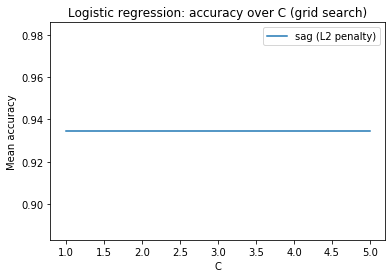

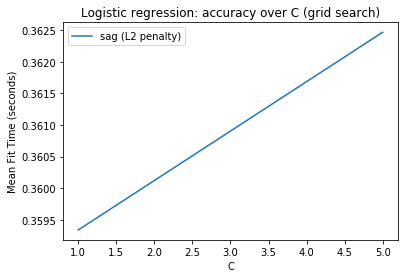

Best CV score (sag solver, L2 penalty): 0.9344969850841002
Best estimator (sag solver, L2 penalty): {'C': 1, 'max_iter': 1000, 'solver': 'saga'}
Test accuracy of Logistic Regression (sag solver, L2 penalty) with best params: 0.935672514619883


In [17]:
######################################################
### Logistic Regression: Comparing Models Across C ###
######################################################

# packages
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

y_test = df1.iloc[687:len(df1),25:29]
from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
#class_weights = class_weight.compute_class_weight('balanced', np.unique(ytrain), ytrain)
#print(class_weights)
# sag solver, l2 penalty
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression() , param_grid={'C': [1, 5], 'solver': ['saga'],'max_iter':[1000]}, 
                                 cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Biopsy,class_weight=class_weights)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()

print("Best CV score (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_score_))
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))
print("Test accuracy of Logistic Regression (sag solver, L2 penalty) with best params: " + str(logistic_reg_CV_1.best_estimator_.score(X_test, y_test_Biopsy)))

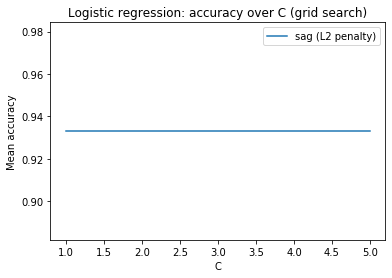

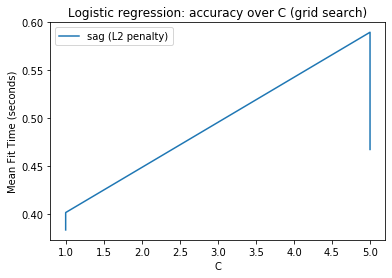

Best CV score (sag solver, L2 penalty): 0.9330477097217814
Best estimator (sag solver, L2 penalty): {'C': 1, 'class_weight': 0.5358814352574103, 'max_iter': 1000, 'solver': 'saga'}
Test accuracy of Logistic Regression (sag solver, L2 penalty) with best params: 0.9415204678362573


In [128]:
######################################################
### Logistic Regression: Comparing Models Across C ###
######################################################

#y_train_Schiller = df1.iloc[0:687,26]
#y_train_Citology = df1.iloc[0:687,27]
#y_train_Biopsy 
# Hinselmann

# packages
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_Biopsy),
                                                 y_train_Biopsy)
# sag solver, l2 penalty 
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression() , param_grid={'C': [1, 5], 'solver': ['saga'],'max_iter':[1000],'class_weight':class_weights}, 
                                 cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Biopsy)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()

print("Best CV score (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_score_))
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))
print("Test accuracy of Logistic Regression (sag solver, L2 penalty) with best params: " + str(logistic_reg_CV_1.best_estimator_.score(X_test, y_test_Biopsy)))